In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline


In [2]:
data = pd.read_csv('table_8_offenses_known_to_law_enforcement_florida_by_city_2013.csv', sep=None, thousands=',', engine='python')[4:294]
# data.head()


data.drop(['Unnamed: 13', 'Unnamed: 5'], 1, inplace=True)

data = data.replace(np.nan, '0')
# data = data.dropna(axis=0)



data.columns = ['City', 'Population', 'Violent Crime', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault', 
                'Property Crime', 'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']



# print(city)

# city = data['City']

population = data['Population'].astype(int)
violent_crime = data['Violent Crime'].astype(int)
murder = data['Murder'].astype(int)
rape = data['Rape'].astype(int)
robbery = data['Robbery'].astype(int)
agg_assault = data['Aggravated Assault'].astype(int)
prop_crime = data['Property Crime'].astype(int)
burglary = data['Burglary'].astype(int)
larceny = data['Larceny'].astype(int)
vehicle_theft = data['Vehicle Theft'].astype(int)
arson = data['Arson'].astype(int)

features = pd.get_dummies(population, columns=None)
crime = pd.get_dummies(population)
city = pd.get_dummies(population)

data.drop(['City'], 1, inplace=True)

features.drop(features.columns, axis=1, inplace=True)

city['Population'] = data['Population']


features['Population'] = (np.where(data['Population'].values.astype(int) > 100000, 1, 0))
features['Violent_Crime'] = data['Violent Crime'].values.astype(int)
features['Violent_Crime2'] = (data['Violent Crime'].values.astype(int) + 100) ** 2
features['Violent_Crime3'] = (data['Violent Crime'].values.astype(int) + 100) ** 3
features['Violent_Crime_Sqrt'] = (data ['Violent Crime'].values.astype(int) + 100) ** .5
features['Murder'] = data['Murder'].values.astype(int)
features['Murder2'] = (data['Murder'].values.astype(int) + 100) ** 2
features['Murder3'] = (data['Murder'].values.astype(int) + 100) ** 3
features['Murder_Sqrt'] = (data['Murder'].values.astype(int) + 100) ** .5
features['Rape'] = data['Rape'].values.astype(int)
features['Robbery'] = data['Robbery'].values.astype(int)
features['Aggravated_Assault'] = data['Aggravated Assault'].values.astype(int)
features['Property_Crime'] = data['Property Crime'].values.astype(int)
features['Burglary'] = data['Burglary'].values.astype(int)
features['Larceny'] = data['Larceny'].values.astype(int)
features['Vehicle_Theft'] = data['Vehicle Theft'].values.astype(int)
features['Arson'] = data['Arson'].values.astype(int)

# print(features['Large_City'])

lrg_population = features['Population']
# crime['Violent_Crime'] = (np.where(data['Violent Crime'].values.astype(int) > violent_crime.values.astype(int).mean(), 1, 0))

crime['Violent_Crime'] = data['Violent Crime'].astype(int).dropna()

# features.shape
# print(violent_crime)



  Population Violent Crime Murder Rape Robbery Aggravated Assault  \
4       9338            36      0    2       2                 32   
5      42040           150      0    8      37                105   
6        536             1      0    0       0                  1   
7       2269             1      0    0       0                  1   
8      45397           178      1   11      57                109   

  Property Crime Burglary Larceny Vehicle Theft Arson  
4            166       40     120             6     1  
5           1564      300    1180            84     3  
6              3        3       0             0     0  
7             35        8      27             0     0  
8           1527      231    1202            94     6  


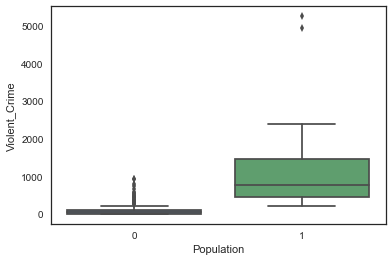

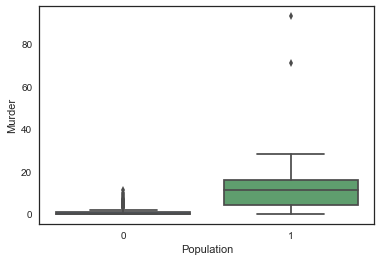

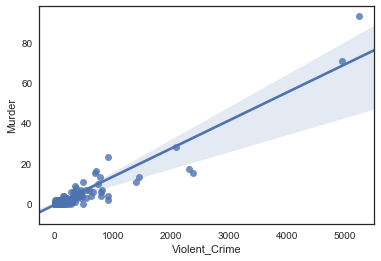

In [3]:
# Take a peek.
print(data.head())

# Prettier plots are better.
sns.set_style("white")

# Bivariate relationships of predictors to admissions outcome.
sns.boxplot(x="Population", y="Violent_Crime", data=features.astype(int))
plt.show()
sns.boxplot(x="Population", y="Murder", data=features.astype(int))
plt.show()

# Relationship between predictors.
sns.regplot(x='Violent_Crime', y='Murder', data=features.astype(int))
plt.show()

## Logistic Regression

In [4]:
# Declare predictors.
X_statsmod = features[['Violent_Crime', 'Murder']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(features['Population'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.113068
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Population   No. Observations:                  290
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                            2
Date:                Sun, 25 Jun 2017   Pseudo R-squ.:                  0.5649
Time:                        16:01:34   Log-Likelihood:                -32.790
converged:                       True   LL-Null:                       -75.353
                                        LLR p-value:                 3.273e-19
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Violent_Crime     0.0052      0.002      3.392      0.001         0.002     0.008
Murder            0.

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
# Calculate accuracy. First, get probability that said crime will occur in a large population.
pred_statsmod = result.predict(X_statsmod)

# Code population as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(features['Population'], pred_y_statsmod)

print('\n Accuracy by population status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by population status
col_0         0   1
Population         
0           266   3
1             8  13

 Percentage accuracy
0.962068965517


In [6]:
# Define the training and test sizes.
trainsize = int(features.shape[0] / 2)
df_test = features.iloc[trainsize:, :].copy()
df_train = features.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['Population'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['Population'])]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))

origparams = np.append(regr1.coef_, regr1.intercept_)

# Re-run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['Population'])]
regrBig.fit(X_train2, Y_train)
print('\nR-squared complex model:')
print(regrBig.score(X_train2, Y_train))

# Store the new parameter estimates for the same features.
newparams = np.append(
    regrBig.coef_[0,0:(len(origparams)-1)],
    regrBig.intercept_)

print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)


R-squared simple model:
0.743600344462

R-squared complex model:
0.743600344462

Parameter Estimates for the same predictors for the small model and large model:
[[-45.661 -45.661]
 [-0.000 -0.000]
 [-0.000 -0.000]
 [-0.120 -0.120]
 [-182.655 -182.655]
 [0.617 0.617]
 [-0.001 -0.001]
 [2679.598 2679.598]
 [45.666 45.666]
 [45.663 45.663]
 [45.664 45.664]
 [-0.002 -0.002]
 [0.002 0.002]
 [0.002 0.002]
 [0.001 0.001]
 [0.019 0.019]
 [-31996.876 -31996.876]]


In [7]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.729964784374
[ -1.00005326e-02   4.26363517e-07  -2.00092862e-10  -5.89128425e-02
  -4.33069538e-02  -4.05482975e-04   4.57685116e-06   4.65527095e-03
   1.35875276e-02   8.99032201e-03   1.07285717e-02  -1.96696612e-03
   2.15427945e-03   2.22572403e-03   1.51432385e-03   1.34434104e-02]
0.729964784374

Parameter Estimates for the same predictors for the small model and large model:
[[-0.010 -0.010]
 [0.000 0.000]
 [-0.000 -0.000]
 [-0.059 -0.059]
 [-0.043 -0.043]
 [-0.000 -0.000]
 [0.000 0.000]
 [0.005 0.005]
 [0.014 0.014]
 [0.009 0.009]
 [0.011 0.011]
 [-0.002 -0.002]
 [0.002 0.002]
 [0.002 0.002]
 [0.002 0.002]
 [0.013 0.013]]


## Ridge Regression

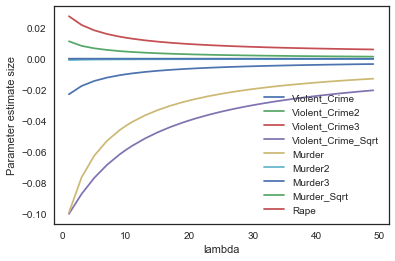

In [8]:
# Store estimates.
estimates = np.append(ridgeregrBig.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

varstoplot = list(estimates_df.columns[:9,])

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

## LASSO Regression

In [9]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.653583538375

Parameter estimates for the model with few features:
[ -6.77168498e-04   2.17434968e-07  -5.81216654e-11  -0.00000000e+00
  -0.00000000e+00   8.14773436e-06   2.13961942e-07  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00   9.13899362e-05
  -1.04282436e-05   1.14082477e-04  -0.00000000e+00   0.00000000e+00
  -3.42018902e-01]

R² for the model with many features:
0.653583538375

Parameter estimates for the model with many features:
[ -6.77168498e-04   2.17434968e-07  -5.81216654e-11  -0.00000000e+00
  -0.00000000e+00   8.14773436e-06   2.13961942e-07  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00   9.13899362e-05
  -1.04282436e-05   1.14082477e-04  -0.00000000e+00   0.00000000e+00
  -3.42018902e-01]


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
